In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('titanic_train.csv')

In [18]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
df.nunique()

Unnamed: 0     891
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.corr()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Unnamed: 0,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
PassengerId,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
e=df.corr()

In [13]:
e['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Unnamed: 0    -0.005007
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [20]:
df.loc[np.where(df['Embarked']=='NAN')]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
df['Embarked'].mode()[0]

'S'

In [23]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
df['Cabin'].mode()[0]

'B96 B98'

<AxesSubplot:ylabel='Density'>

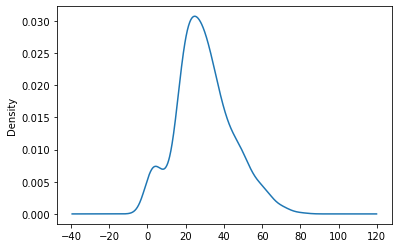

In [32]:
df['Age'].plot(kind='kde')

In [43]:
a=df['Age'].fillna(df['Age'].mean())

In [44]:
b=df['Age'].fillna(df['Age'].median())

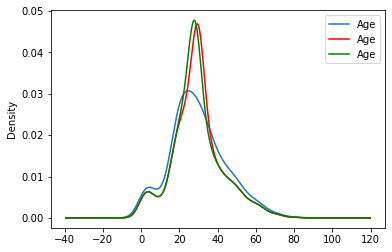

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
a.plot(kind='kde', ax=ax, color='red')
b.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
a.mean()

29.69911764705882

In [40]:
a.median()

28.0

In [46]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [47]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df.drop(columns=['Unnamed: 0', 'Name', 'Ticket', 'PassengerId'],inplace=True)

In [51]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [53]:
df['Cabin'].fillna('Missing',inplace=True)

In [54]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Missing,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Missing,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,Missing,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [55]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [56]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,M,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,M,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,M,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,M,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,28.0,1,2,23.4500,M,S
889,1,1,male,26.0,0,0,30.0000,C,C


In [57]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
orc=OrdinalEncoder(categories=[['T', 'M', 'G', 'F', 'E', 'D', 'C', 'B', 'A']])

In [60]:
df['Cabin']=orc.fit_transform(df['Cabin'].to_numpy().reshape(-1, 1))

In [61]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,1.0,S
1,1,1,female,38.0,1,0,71.2833,6.0,C
2,1,3,female,26.0,0,0,7.9250,1.0,S
3,1,1,female,35.0,1,0,53.1000,6.0,S
4,0,3,male,35.0,0,0,8.0500,1.0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1.0,S
887,1,1,female,19.0,0,0,30.0000,7.0,S
888,0,3,female,28.0,1,2,23.4500,1.0,S
889,1,1,male,26.0,0,0,30.0000,6.0,C


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0,S
1,1,1,0,38.0,1,0,71.2833,6.0,C
2,1,3,0,26.0,0,0,7.9250,1.0,S
3,1,1,0,35.0,1,0,53.1000,6.0,S
4,0,3,1,35.0,0,0,8.0500,1.0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0,S
887,1,1,0,19.0,0,0,30.0000,7.0,S
888,0,3,0,28.0,1,2,23.4500,1.0,S
889,1,1,1,26.0,0,0,30.0000,6.0,C


In [73]:
pd.get_dummies(df.Embarked, prefix="Emb",drop_first = True)

,Emb_1
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [71]:
df['Embarked']=pd.get_dummies(df.Embarked, prefix="Emb",drop_first = True)

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0,0
1,1,1,0,38.0,1,0,71.2833,6.0,0
2,1,3,0,26.0,0,0,7.9250,1.0,0
3,1,1,0,35.0,1,0,53.1000,6.0,0
4,0,3,1,35.0,0,0,8.0500,1.0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0,0
887,1,1,0,19.0,0,0,30.0000,7.0,0
888,0,3,0,28.0,1,2,23.4500,1.0,0
889,1,1,1,26.0,0,0,30.0000,6.0,0


In [74]:
X=df.drop(labels='Survived',axis=1)

In [75]:
y=df['Survived']

In [79]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25, random_state=355)

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred=lr.predict(x_test)

In [85]:
accuracy_score(y_test,y_pred)

0.757847533632287

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       145
           1       0.64      0.69      0.67        78

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_pred1=lr.predict(x_test)

In [91]:
accuracy_score(y_test,y_pred1)

0.757847533632287

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       145
           1       0.64      0.69      0.67        78

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [100]:
param_grid = { 'bootstrap': [True],
'max_depth': [10, 20, 30 ],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400]
}

In [101]:
gridsearch= GridSearchCV(rf,param_grid)

In [102]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400]})

In [103]:
gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [107]:
model1=RandomForestClassifier(bootstrap= True,
 max_depth=20,
 max_features='sqrt',
 min_samples_leaf=4,
 min_samples_split=5,
 n_estimators=200)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [108]:
y_pred2=lr.predict(x_test)

In [109]:
accuracy_score(y_test,y_pred)

0.757847533632287